In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14835286164598488848
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5748293632
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5514948293413644957
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

##data

In [2]:
# 対応する漢字(dir) 完成版
# classDB
kanji_dict = {'0x4e00': '一', '0x4e0a': '上', '0x4e0b': '下', '0x4e0d': '不', '0x4e0e': '与', '0x4e01': '丁', '0x4e2d': '中', '0x4e03': '七', '0x4e3b': '丼', '0x4e4b': '之', '0x4e4e': '乎', '0x4e5d': '九', '0x4e5e': '乞', '0x4e5f': '也', '0x4e07': '万', '0x4e7e': '乾', '0x4e08': '丈', '0x4e8b': '事', '0x4e8c': '二', '0x4e8e': '于', '0x4e09': '三', '0x4e9b': '堂', '0x4e14': '且', '0x4e16': '世', '0x4e21': '両', '0x4e26': '並', '0x4e32': '串', '0x4e38': '丸', '0x4e39': '丹', '0x4e45': '久', '0x4e57': '乗', '0x4e58': '乗', '0x4e71': '乱', '0x4e73': '乳', '0x4e80': '亀', '0x4e82': '龍', '0x4e86': '了', '0x4e88': '予', '0x4e91': '云', '0x4e92': '互', '0x4e94': '五', '0x4e95': '井', '0x4ea1': '亡', '0x4ea4': '交', '0x4ea5': '亥', '0x4ea6': '亦', '0x4eab': '享', '0x4eac': '京', '0x4ead': '亭', '0x4eba': '人', '0x4ec1': '仁', '0x4eca': '今', '0x4ecb': '介', '0x4ecf': '彿', '0x4ed5': '仕', '0x4ed6': '他', '0x4ed8': '付', '0x4ed9': '仙', '0x4ee3': '代', '0x4ee4': '令', '0x4ee5': '以', '0x4eee': '仮', '0x4ef0': '作', '0x4ef2': '伸', '0x4ef6': '件', '0x4efb': '任', '0x4f0a': '伊', '0x4f0f': '伏', '0x4f1a': '會', '0x4f1d': '傳', '0x4f2f': '伯', '0x4f3c': '似', '0x4f4d': '位', '0x4f4f': '住', '0x4f5b': '仏', '0x4f5c': '作', '0x4f7f': '使', '0x4f8b': '例', '0x4f8d': '待', '0x4f9b': '供', '0x4f10': '伐', '0x4f11': '休', '0x4f34': '休', '0x4f46': '但', '0x4f50': '佐', '0x4f53': '体', '0x4f55': '何', '0x4f59': '余', '0x4f76': '佶', '0x4f86': '求', '0x4fad': '侭', '0x4fbf': '便', '0x4fc4': '俄', '0x4fd7': '俗', '0x4fdd': '保', '0x4fe1': '信', '0x4ff3': '俳', '0x4ff5': '俵', '0x5a01': '威', '0x5a5a': '婚', '0x5a6c': '揺', '0x5a18': '娘', '0x5a46': '婆', '0x5a66': '婦', '0x5ac1': '嫁', '0x5ac9': '疾', '0x5acc': '嫌', '0x5b5d': '孝', '0x5b5f': '孟', '0x5b6b': '孫', '0x5b09': '海', '0x5b9a': '定', '0x5b9b': '宛', '0x5b9c': '宜', '0x5b9d': '宝', '0x5b9f': '実', '0x5b22': '滾', '0x5b50': '子', '0x5b57': '字', '0x5b58': '存', '0x5b63': '季', '0x5b66': '学', '0x5b78': '学', '0x5b85': '宅', '0x5b87': '宇', '0x5b88': '守', '0x5b89': '安', '0x5b97': '宗', '0x5b98': '官', '0x5ba2': '客', '0x5ba4': '室', '0x5ba5': '宥', '0x5bae': '宮', '0x5bb3': '害', '0x5bb5': '宵', '0x5bb6': '家', '0x5bb9': '容', '0x5bbf': '忘', '0x5bc4': '寄', '0x5bc6': '密', '0x5bcc': '富', '0x5bd0': '窪', '0x5bd2': '寒', '0x5bdd': '寝', '0x5bdf': '察', '0x5be2': '霞', '0x5be6': '實', '0x5bf3': '賽', '0x5bf6': '賽', '0x5bf8': '寸', '0x50ac': '催', '0x50b3': '傳', '0x50be': '仰', '0x50de': '偽', '0x50e5': '僥', '0x50e7': '僧', '0x51a0': '冠', '0x51a5': '冥', '0x51ac': '冬', '0x51b7': '冷', '0x51c9': '凉', '0x51e1': '斤', '0x51e6': '処', '0x51f6': '凶', '0x51fa': '出', '0x52a0': '加', '0x52a9': '助', '0x52aa': '努', '0x52b4': '労', '0x52d5': '動', '0x52d8': '勘', '0x52d9': '務', '0x52dd': '勝', '0x52de': '勞', '0x52e2': '勢', '0x52e4': '勤', '0x52e7': '勧', '0x52fa': '夕', '0x52ff': '勿', '0x53ad': '厭', '0x53bb': '玄', '0x53c2': '参', '0x53c3': '参', '0x53c8': '又', '0x53ca': '及', '0x53cb': '友', '0x53cd': '反', '0x53d6': '取', '0x53d7': '受', '0x53e3': '口', '0x53e4': '古', '0x53e5': '句', '0x53ea': '只', '0x53eb': '叫', '0x53ec': '召', '0x53ef': '可', '0x53f0': '台', '0x53f2': '史', '0x53f3': '右', '0x53f7': '号', '0x53f8': '司', '0x54b2': '吃', '0x54c0': '哀', '0x54c1': '品', '0x54c9': '哉', '0x54e5': '哥', '0x55a7': '喧', '0x55b0': '喰', '0x56d8': '回', '0x56db': '四', '0x56de': '回', '0x56e0': '因', '0x56f0': '困', '0x56f2': '囲', '0x56f3': '圖', '0x56fa': '固', '0x56fd': '國', '0x57a3': '垣', '0x57cb': '埋', '0x57ce': '城', '0x57f7': '執', '0x58a8': '墨', '0x58c1': '堡', '0x58df': '壠', '0x58eb': '士', '0x58f0': '声', '0x58f1': '壱', '0x58f2': '売', '0x58f7': '索', '0x58fa': '壽', '0x59ac': '妬', '0x59b9': '妹', '0x59bb': '妻', '0x59c9': '姉', '0x59cb': '始', '0x59d1': '姑', '0x53d3': '姓', '0x59dc': '姜', '0x59eb': '姫', '0x59ff': '姿', '0x500b': '個', '0x501f': '備', '0x508d': '傍', '0x514d': '免', '0x514e': '兎', '0x516b': '八', '0x516c': '公', '0x516d': '六', '0x517c': '兼', '0x518a': '冊', '0x518d': '再', '0x519d': '宜', '0x521d': '初', '0x523a': '刺', '0x523b': '刻', '0x524d': '前', '0x529b': '力', '0x529f': '功', '0x534a': '半', '0x536f': '卯', '0x537f': '郷', '0x539a': '厚', '0x539f': '原', '0x540c': '同', '0x540d': '名', '0x540e': '后', '0x541b': '君', '0x541f': '吟', '0x542b': '含', '0x543e': '吾', '0x544a': '吉', '0x547c': '呼', '0x547d': '命', '0x548c': '和', '0x552f': '唯', '0x554f': '同', '0x559c': '喜', '0x564c': '噌', '0x567a': '彩', '0x570b': '困', '0x571f': '土', '0x574a': '坊', '0x576a': '坪', '0x582a': '堪', '0x590f': '夏', '0x591a': '多', '0x591c': '夜', '0x592a': '太', '0x592b': '史', '0x592e': '央', '0x596a': '奪', '0x4453': '臺', '0x5009': '倉', '0x5012': '倒', '0x5019': '以', '0x5036': '倶', '0x5047': '假', '0x5074': '側', '0x5099': '備', '0x5100': '儀', '0x5118': '伃', '0x5143': '元', '0x5144': '兄', '0x5148': '先', '0x5149': '光', '0x5150': '児', '0x5165': '入', '0x5168': '全', '0x5169': '両', '0x5171': '共', '0x5175': '兵', '0x5176': '其', '0x5177': '具', '0x5185': '内', '0x5200': '刀', '0x5206': '分', '0x5207': '切', '0x5208': '刈', '0x5215': '州', '0x5224': '判', '0x5225': '別', '0x5229': '利', '0x5236': '制', '0x5247': '則', '0x5272': '割', '0x5301': '夊', '0x5302': '匂', '0x5305': '包', '0x5316': '化', '0x5317': '小', '0x5341': '十', '0x5343': '千', '0x5345': '爪', '0x5347': '升', '0x5348': '午', '0x5351': '卑', '0x5352': '卒', '0x5353': '卓', '0x5357': '南', '0x5370': '印', '0x5373': '即', '0x5374': '却', '0x5375': '卵', '0x5377': '巻', '0x5404': '各', '0x5408': '合', '0x5409': '告', '0x5410': '吐', '0x5411': '向', '0x5426': '否', '0x5438': '吸', '0x5439': '吹', '0x5442': '呂', '0x5449': '号', '0x5451': '呑', '0x5468': '周', '0x5473': '味', '0x5484': '吐', '0x5504': '唄', '0x5510': '唐', '0x5531': '唱', '0x5546': '高', '0x5584': '善', '0x5609': '嘉', '0x5618': '嘘', '0x5629': '笑', '0x5668': '器', '0x5712': '園', '0x5713': '圓', '0x5716': '圖', '0x5718': '團', '0x5728': '在', '0x5730': '地', '0x5742': '坂', '0x5750': '坐', '0x5782': '無', '0x5800': '堀', '0x5802': '堂', '0x5805': '堅', '0x5831': '報', '0x5834': '場', '0x5857': '塗', '0x5869': '塩', '0x5875': '塵', '0x5883': '境', '0x5897': '増', '0x5909': '変', '0x5915': '夕', '0x5916': '外', '0x5922': '夢', '0x5927': '大', '0x5929': '天', '0x5931': '失', '0x5937': '夷', '0x5947': '奇', '0x5948': '奈', '0x5949': '奉', '0x5951': '契', '0x5962': '奢', '0x5965': '奥', '0x5967': '奥', '0x5973': '女', '0x5974': '奴', '0x5982': '如', '0x5993': '妓', '0x5999': '妙', '0x583a': '堺', '0x597d': '好', '0x57a2': '垢', '0x5983': '妃', '0x59d3': '姓', '0x5152': '児', '0x548e': '咎', '0x5098': '傘', '0x5243': '剃', '0x4e3c': '丼', '0x4fef': '俯', '0x4fee': '修', '0x5230': '到', '0x5320': '匠', '0x5016': '倖', '0x58fd': '壽'}

In [11]:
# 要修正
# colab用で作成済み
# pngを漢字ごとに種類分け
import glob, cv2, os
import matplotlib.pyplot as plt

# 初期設定
data_path = 'classicDB'
data_file = glob.glob(data_path + '/*.png')

save_file = 'kanji-model2'
os.mkdir(save_file)

append_kanji = {}
kanji_file_name = []

# 実行
for file in data_file:    
    img = cv2.imread(file)
    name_path = file.split('Rep')[0]
    name_path = name_path.split('x')[-1]
    name_path = '0x'+name_path
    print(name_path)
    
    if name_path not in kanji_dict.keys():# dict内にない場合
    # 画像を表示してフォルダ名を決定
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        title = input("これは何？: ")
        folder_path = save_file + '/' + str(title)
        print('新たに「' + str(title) + '」を登録します。')
        kanji_dict[name_path] = str(title)
        append_kanji[name_path] = str(title)
        os.mkdir(folder_path)
        
    # フォルダを作成
    if kanji_dict[name_path] not in kanji_file_name:
        kanji_file_name.append(kanji_dict[name_path])
        os.mkdir(save_file + '/' + kanji_dict[name_path])
        print("「" + kanjidict[name_path] + "」を作成します。")

    # pngを保存
    num = file.split('Rep')[-1]
    file_path = save_file + '/' + kanji_dict[name_path] + '/'+ num
    cv2.imwrite(file_path, img)

print(append_kanji)
print('finish')

{}
finish


##model

今回のデータで分類するクラス数は「 147 」です。
--- 読み込んだデータセットは 147kanji\両 です。
--- 読み込んだデータセットは 147kanji\予 です。
--- 読み込んだデータセットは 147kanji\今 です。
--- 読み込んだデータセットは 147kanji\仙 です。
--- 読み込んだデータセットは 147kanji\令 です。
--- 読み込んだデータセットは 147kanji\伽 です。
--- 読み込んだデータセットは 147kanji\佃 です。
--- 読み込んだデータセットは 147kanji\佐 です。
--- 読み込んだデータセットは 147kanji\併 です。
--- 読み込んだデータセットは 147kanji\俊 です。
--- 読み込んだデータセットは 147kanji\個 です。
--- 読み込んだデータセットは 147kanji\値 です。
--- 読み込んだデータセットは 147kanji\偵 です。
--- 読み込んだデータセットは 147kanji\傑 です。
--- 読み込んだデータセットは 147kanji\傘 です。
--- 読み込んだデータセットは 147kanji\備 です。
--- 読み込んだデータセットは 147kanji\傭 です。
--- 読み込んだデータセットは 147kanji\傷 です。
--- 読み込んだデータセットは 147kanji\傾 です。
--- 読み込んだデータセットは 147kanji\僅 です。
--- 読み込んだデータセットは 147kanji\僧 です。
--- 読み込んだデータセットは 147kanji\僻 です。
--- 読み込んだデータセットは 147kanji\儲 です。
--- 読み込んだデータセットは 147kanji\其 です。
--- 読み込んだデータセットは 147kanji\分 です。
--- 読み込んだデータセットは 147kanji\切 です。
--- 読み込んだデータセットは 147kanji\加 です。
--- 読み込んだデータセットは 147kanji\厨 です。
--- 読み込んだデータセットは 147kanji\叢 です。
--- 読み込んだデータセットは 147kanji\周 です。
--- 読み込んだデータセ

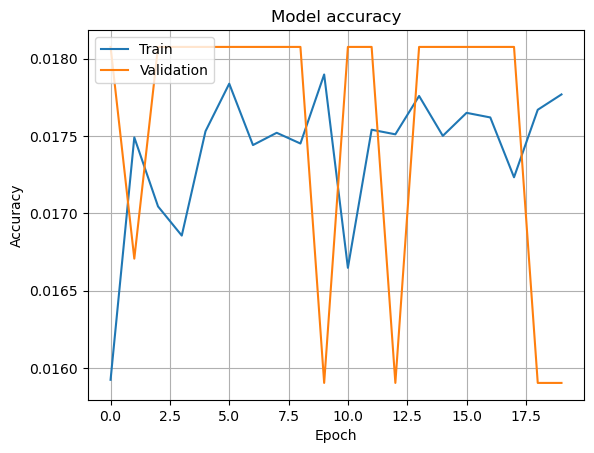

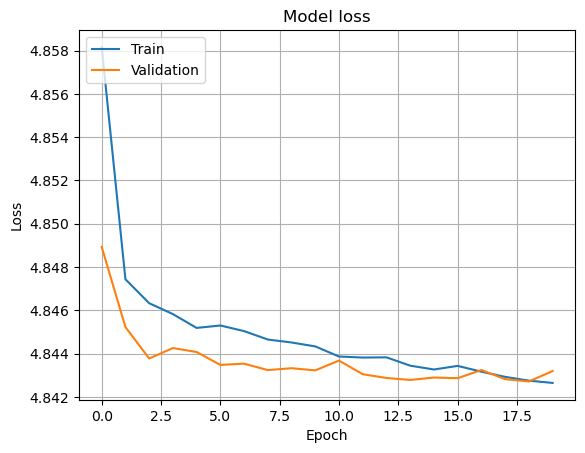

Loss: 4.843200206756592 （損失関数値 - 0に近いほど正解に近い）
Accuracy: 1.5904631465673447 % （精度 - 100% に近いほど正解に近い）
Computation time（計算時間）:454.141 sec（秒）


In [3]:
#1 各種インポート
import tensorflow
import keras

import glob, time, os, datetime
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


#2 各種設定
# この枠内のパラメータを変更

train_data_path = '147kanji/*'
image_width = 32
image_height = 32
color_setting = 1 # データセット画像のカラー指定：「1」はモノクロ・グレースケール。「3」はカラーとして画像を処理
batch = 32 # バッチサイズ
epoch = 20 # 学習回数
max_images_per_class = 50 # 各クラスごとの最大画像数

# Data Augmentation（データ拡張）
datagen = ImageDataGenerator(
    #回転
    rotation_range = 15,
    #ランダムにズーム
    zoom_range = [0.8, 1.2]    
    )

# 以下は必要がない限りいじらないこと
#3 データセットの読み込みとデータ形式の設定・正規化・分割

# 並び替え
folder = glob.glob(train_data_path)
folder = sorted(folder)


class_number = len(folder)
print('今回のデータで分類するクラス数は「', str(class_number), '」です。')


X_image = []
Y_label = []
for index, name in enumerate(folder):
    read_data = name
    files = glob.glob(read_data + '/*.png')
    print('--- 読み込んだデータセットは',  read_data, 'です。')

    for i, file in enumerate(files):
        if color_setting == 1:
            img = load_img(file, color_mode = 'grayscale' ,target_size=(image_width, image_height))
        elif color_setting == 3:
            img = load_img(file, color_mode = 'rgb' ,target_size=(image_width, image_height))
        array = img_to_array(img)
        
        # ファイル数がmax_images_per_class未満の場合、画像を水増し
        if len(files) < max_images_per_class:
            array = array.reshape((1,) + array.shape)
            for Batch in datagen.flow(array, batch_size=1):
                X_image.append(Batch[0])
                Y_label.append(index)
                if len(X_image) % 50 == 0:
                    break
        else:
            X_image.append(array)
            Y_label.append(index)

X_image = np.array(X_image)
Y_label = np.array(Y_label)

X_image = X_image.astype('float32') / 255
Y_label = to_categorical(Y_label, class_number)

train_images, valid_images, train_labels, valid_labels = train_test_split(X_image, Y_label, test_size=0.25)
x_train = train_images
y_train = train_labels
x_test = valid_images
y_test = valid_labels

#4 機械学習（人工知能）モデルの作成 – 畳み込みニューラルネットワーク（CNN）・学習の実行等

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu',
                 input_shape=(image_width, image_height, color_setting)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
          
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(class_number, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


start_time = time.time()

history = model.fit(x_train, y_train, batch_size=batch, epochs=epoch, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', score[0], '（損失関数値 - 0に近いほど正解に近い）')
print('Accuracy:', score[1] * 100, '%', '（精度 - 100% に近いほど正解に近い）')
print('Computation time（計算時間）:{0:.3f} sec（秒）'.format(time.time() - start_time))


# 学習済みモデル（モデル構造と学習済みの重み）の保存
# 名前は自分がわかりやすい名前にしてください
model.save('model-32-20-50_2.h5')

In [10]:
# 学習モデルによる単独漢字識別
# test

#1 ライブラリのインポート等

from keras.models import load_model
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
kanji_file = "kanji-model/content/kanji-model/"
title_dict = {}

for sakuma-file in ("sakuma-xxxx-xxxmethod1OUT/sakuma-xxxx-xxxmethod1OUT/*"):
    files = glob.glob(sakuma-file +"/*png") # データ
    files.sort()

#2 各種設定

    image_width = 28   # ここを変更
                      # 利用する学習済みモデルの横の幅のピクセル数と同じにする
    image_height = 28  # ここを変更
                      # 利用する学習済みモデルの縦の高さのピクセル数と同じにする
    color_setting = 1  # ここを変更。利用する学習済みモデルのカラー形式と同じにする
                      # 「1」はモノクロ・グレースケール。「3」はカラー。
    

#3 各種読み込み
    
    model = load_model('model-10.h5')  # ここを変更
                                                            # 読み込む学習済みモデルを入れます
    
    # モノクロ・グレー形式の学習済みモデルを読み込む例：color_setting = 1 の学習済みモデルを使う場合
    #model = load_model('keras_cnn_japanese_handwritten_gray14*14_model.h5')
    
    # カラー形式の学習済みモデルを読み込む例：color_setting = 3 の学習済みモデルを使う場合
    #model = load_model('keras_cnn_japanese_handwritten_color14*14_model.h5')
    
    train_data_path = 'kanji-model/content/kanji-model/*'　# ここを変更。
    folder = glob.glob(train_data_path)
    folder =  sorted(folder)
    
    #4 画像の表示・各種設定等
    
    for file in files:
        if color_setting == 1:
          img = cv2.imread(file, 0)
        elif color_setting == 3:
          img = cv2.imread(file, 1)
        img = cv2.resize(img, (image_width, image_height))
        plt.imshow(img)
        if color_setting == 1:
          plt.gray()
          plt.show()
        elif color_setting == 3:
          plt.show()
    
        img = img.reshape(image_width, image_height, color_setting).astype('float32')/255
    
    
        #5 予測と結果の表示等
    
        prediction = model.predict(np.array([img]))
        result = prediction[0]
    
        for i, accuracy in enumerate(result):
          if int(accuracy * 100) != 0:
            print('画像認識AIは「', os.path.basename(folder[i]), '」の確率を', int(accuracy * 100), '% と予測しました。')
    
        print('-------------------------------------------------------')
        print('予測結果は、「', os.path.basename(folder[result.argmax()]),'」です。')
        # title = input("正しい漢字を入力してください: ") #正しいときは0, わからないときは空白（＝除外）
        # if title == "": title = "除外"
        # elif title == "0": title = os.path.basename(folder[result.argmax()])
    
        # if str(title) not in title_dict.keys():
        #   title_dict[str(title)] = 0
        #   title_file = kanji_file + str(title)
        #   !mkdir {str(title_file)}
        # else:
        #   title_dict[str(title)] += 1

        if int(accuracy * 100) > 95:
            title = os.path.basename(folder[result.argmax()])
            
            if title not in train_data
            title_file = kanji_file + str(title)
            !mkdir {str(title_file)}
        
            kanji_file_append = kanji_file + str(title) + "/.png"
            cv2.imwrite(kanji_file_append, img)

        else:
            

print('finish')

SyntaxError: cannot assign to operator (3800086517.py, line 15)

In [ ]:
# 完成していない
import numpy as np
import matplotlib.pyplot as plt

# データセットの読み込み
with open('ETL9G_01', 'rb') as f:
    data = f.read()

# 画像データの抽出と変換
image_data = np.frombuffer(data, dtype=np.uint8)

# 画像データの表示
plt.imshow(image_data.reshape(64, 63), cmap='gray')

# 画像データの保存
plt.imsave('image.png', image_data.reshape(64, 63), cmap='gray')
